   Node Size  Average Runtime (ms)
0          5                0.2136
1          7                0.1492
2          6                0.0909
3         10                0.1903
4          7                0.0933


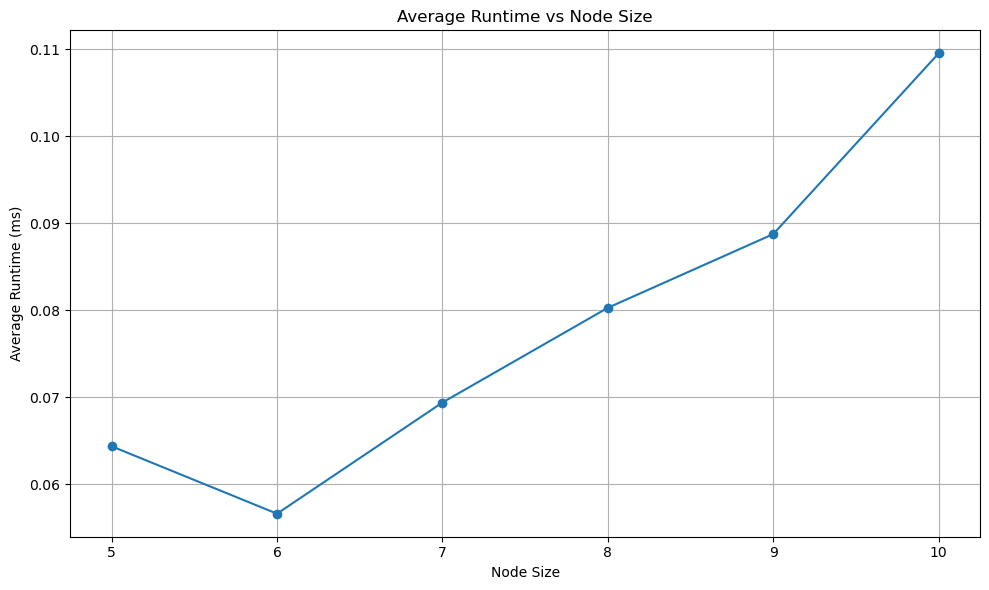

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_runtime(csv_file, node_size_col, runtime_col):
    # Load the CSV data into a DataFrame
    data = pd.read_csv(csv_file)

    # Display the first few rows of the DataFrame (optional)
    print(data.head())

    # Group by Node Size and calculate the average runtime
    average_runtime = data.groupby(node_size_col)[runtime_col].mean().reset_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(average_runtime[node_size_col], average_runtime[runtime_col], marker='o', linestyle='-')
    plt.title('Average Runtime vs Node Size')
    plt.xlabel('Node Size')
    plt.ylabel('Average Runtime (ms)')
    plt.xticks(average_runtime[node_size_col])  # Set x-ticks to be the node sizes
    plt.grid()
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
plot_average_runtime('resultsMDS.csv', 'Node Size', 'Average Runtime (ms)')

   Node Size  Average Runtime (ms)
0         10                0.0926
1          9                0.0282
2          5                0.0181
3         10                0.0307
4          5                0.0156


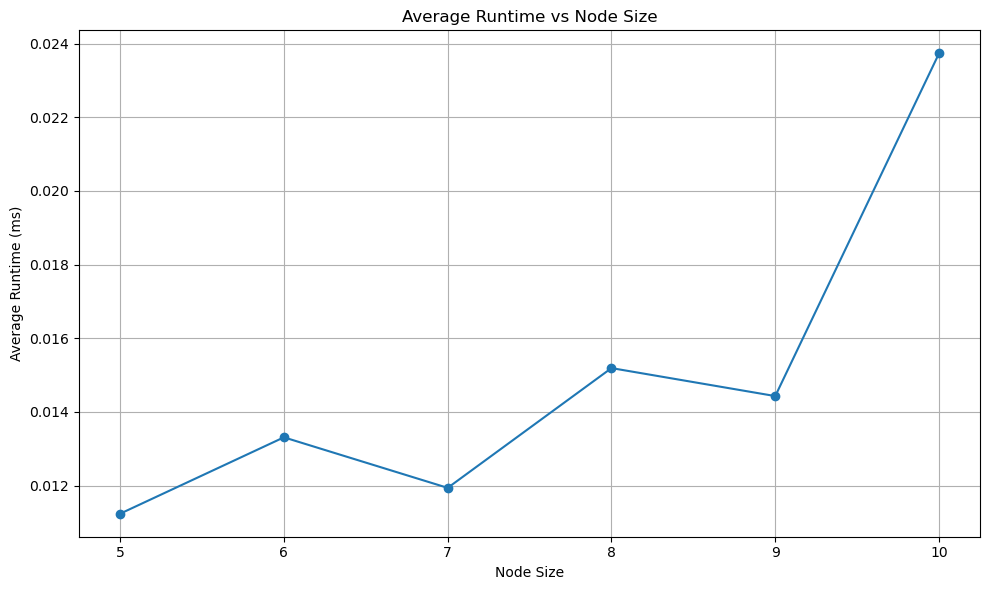

In [33]:
plot_average_runtime('resultsKdTree.csv', 'Node Size', 'Average Runtime (ms)')

   Node Size  Average Runtime (ms)
0          6                0.0562
1          7                0.0289
2          9                0.0484
3          5                0.0132
4          7                0.0254


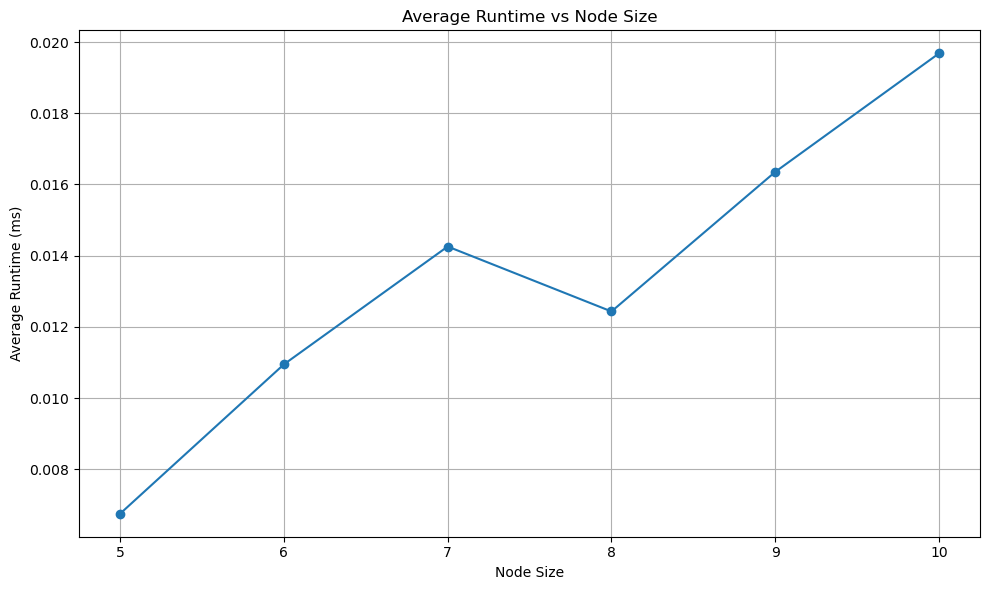

In [34]:
plot_average_runtime('resultsNaive.csv', 'Node Size', 'Average Runtime (ms)')

Data from resultsMDS.csv:
   Node Size  Average Runtime (ms)
0          5                0.2136
1          7                0.1492
2          6                0.0909
3         10                0.1903
4          7                0.0933
Data from resultsKdTree.csv:
   Node Size  Average Runtime (ms)
0         10                0.0926
1          9                0.0282
2          5                0.0181
3         10                0.0307
4          5                0.0156
Data from resultsNaive.csv:
   Node Size  Average Runtime (ms)
0          6                0.0562
1          7                0.0289
2          9                0.0484
3          5                0.0132
4          7                0.0254


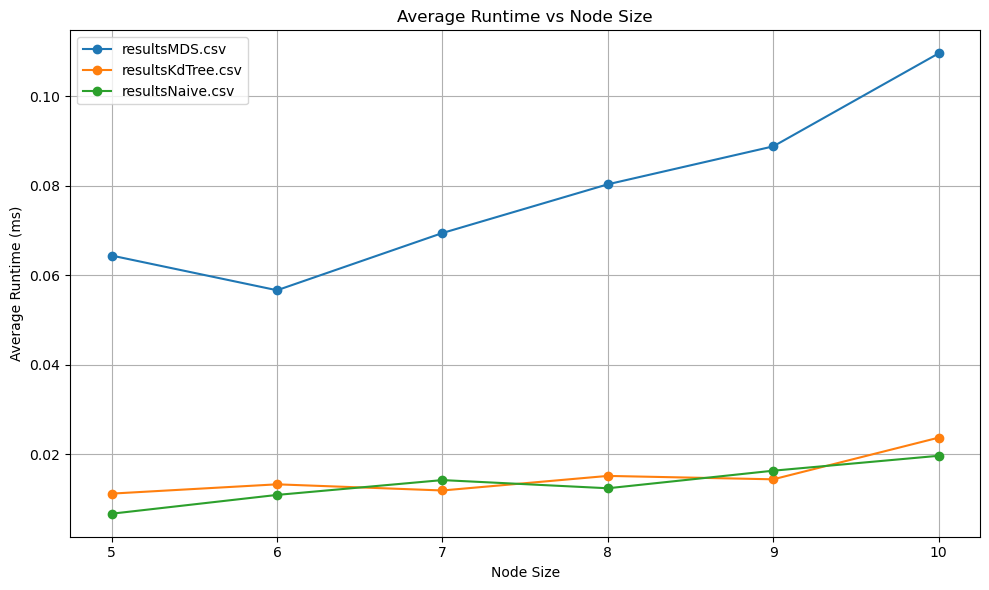

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_runtime(csv_files, node_size_col, runtime_col):
    plt.figure(figsize=(10, 6))
    
    for csv_file in csv_files:
        # Load the CSV data into a DataFrame
        data = pd.read_csv(csv_file)

        # Display the first few rows of the DataFrame (optional)
        print(f"Data from {csv_file}:")
        print(data.head())

        # Group by Node Size and calculate the average runtime
        average_runtime = data.groupby(node_size_col)[runtime_col].mean().reset_index()

        # Plotting
        plt.plot(average_runtime[node_size_col], average_runtime[runtime_col], marker='o', linestyle='-', label=csv_file)

    # Adding titles and labels
    plt.title('Average Runtime vs Node Size')
    plt.xlabel('Node Size')
    plt.ylabel('Average Runtime (ms)')
    plt.xticks(average_runtime[node_size_col])  # Set x-ticks to be the node sizes
    plt.grid()
    plt.legend()  # Add a legend to differentiate between datasets
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
plot_average_runtime(['resultsMDS.csv', 'resultsKdTree.csv','resultsNaive.csv'], 'Node Size', 'Average Runtime (ms)')

In [37]:
# Load the CSV data into a DataFrame
data = pd.read_csv('results.csv')
data

,Trial,Node Size,Algorithm,Runs Time (ms)
0,1,8,Minimum Dominating Set,0.29
1,1,8,Naive Camera Position,3.84
2,1,8,KD-Tree Camera Position,0.12
3,2,5,Minimum Dominating Set,0.09
4,2,5,Naive Camera Position,0.09
...,...,...,...,...
295,99,7,Naive Camera Position,0.04
296,99,7,KD-Tree Camera Position,0.02
297,100,9,Minimum Dominating Set,0.06
298,100,9,Naive Camera Position,0.02


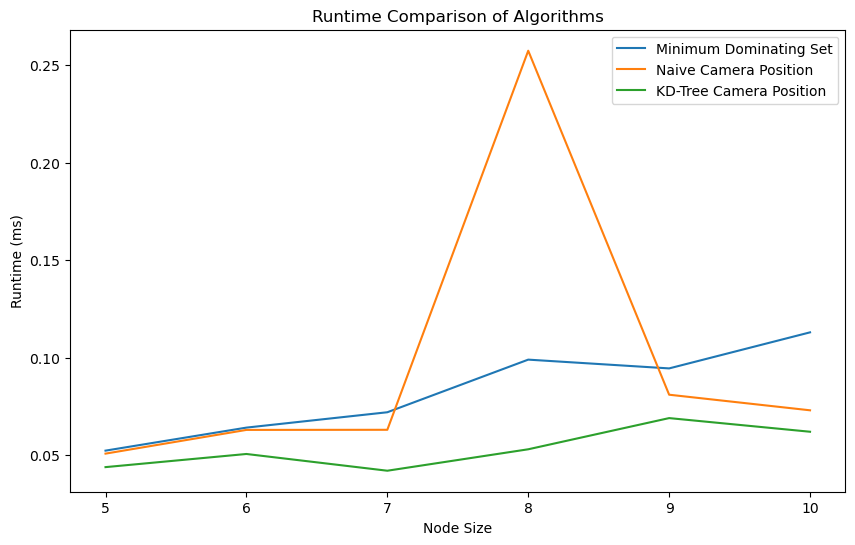

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('results.csv')

# Group the data by Algorithm and Node Size, then calculate the mean runtime
grouped_data = data.groupby(['Algorithm', 'Node Size'])['Runs Time (ms)'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
for algorithm in data['Algorithm'].unique():
    algorithm_data = grouped_data[grouped_data['Algorithm'] == algorithm]
    plt.plot(algorithm_data['Node Size'], algorithm_data['Runs Time (ms)'], label=algorithm)

# Add labels and a legend
plt.xlabel('Node Size')
plt.ylabel('Runtime (ms)')
plt.title('Runtime Comparison of Algorithms')
plt.legend()

# Show the plot
plt.show()

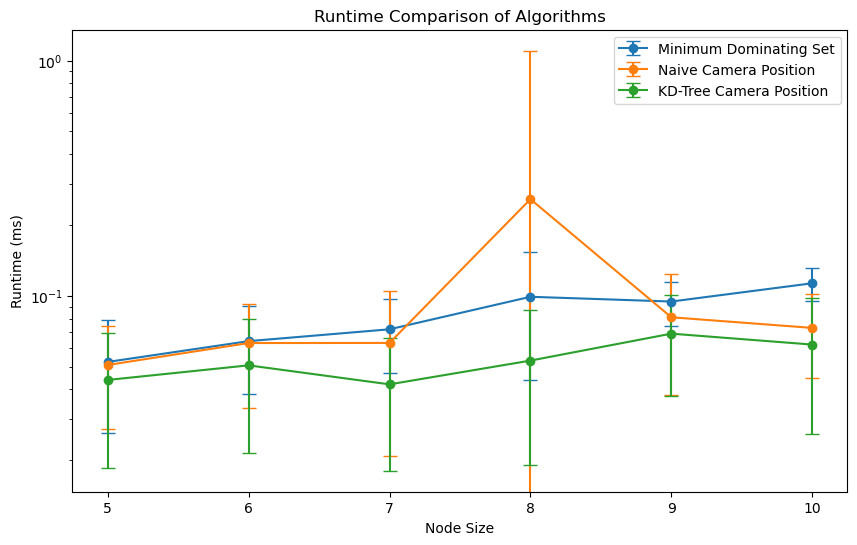

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('results.csv')

# Group the data by Algorithm and Node Size, calculate mean and standard deviation
grouped_data = data.groupby(['Algorithm', 'Node Size']).agg({'Runs Time (ms)': ['mean', 'std']}).reset_index()

# Create a line plot with error bars
plt.figure(figsize=(10, 6))
for algorithm in data['Algorithm'].unique():
    algorithm_data = grouped_data[grouped_data['Algorithm'] == algorithm]
    plt.errorbar(
        algorithm_data['Node Size'],
        algorithm_data['Runs Time (ms)', 'mean'],  # Use MultiIndex indexing
        yerr=algorithm_data['Runs Time (ms)', 'std'],  # Use MultiIndex indexing
        label=algorithm,
        marker='o',
        linestyle='-',
        capsize=5
    )

# Add labels, legend, and logarithmic scale on y-axis
plt.xlabel('Node Size')
plt.ylabel('Runtime (ms)')
plt.title('Runtime Comparison of Algorithms')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for y-axis

# Show the plot
plt.show()

In [67]:
import scipy.stats as stats

# Group the data by Algorithm
grouped_data = data.groupby('Algorithm')['Runs Time (ms)']

# Unpack the Series into separate NumPy arrays
groups = [group.to_numpy() for name, group in grouped_data]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 1.3732746854610571
p-value: 0.2548796547764797


In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(data['Runs Time (ms)'], data['Algorithm'])

print(tukey_results)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
         group1                 group2         meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------------
KD-Tree Camera Position Minimum Dominating Set   0.0288 0.6262 -0.0447 0.1023  False
KD-Tree Camera Position  Naive Camera Position   0.0516  0.225 -0.0219 0.1251  False
 Minimum Dominating Set  Naive Camera Position   0.0228 0.7455 -0.0507 0.0963  False
------------------------------------------------------------------------------------


In [51]:
correlation_coefficient, p_value = stats.pearsonr(data['Node Size'], data['Runs Time (ms)'])

print("Pearson Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Pearson Correlation Coefficient: 0.07143973451586794
p-value: 0.2172834585942785


In [53]:
correlation_coefficient, p_value = stats.spearmanr(data['Node Size'], data['Runs Time (ms)'])

print("Spearman Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Spearman Correlation Coefficient: 0.32753649930586776
p-value: 6.229581473757902e-09


In [55]:
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(data['Node Size'])
y = data['Runs Time (ms)']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Runs Time (ms)   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.529
Date:                Fri, 27 Sep 2024   Prob (F-statistic):              0.217
Time:                        23:41:27   Log-Likelihood:                 28.557
No. Observations:                 300   AIC:                            -53.11
Df Residuals:                     298   BIC:                            -45.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.063      0.057      0.9

In [79]:
import numpy as np

# Example: Polynomial regression
model = np.polyfit(data['Node Size'], data['Runs Time (ms)'], deg=2)
model

array([-0.00501946,  0.08490119, -0.26212969])

<Axes: xlabel='Algorithm', ylabel='Runs Time (ms)'>

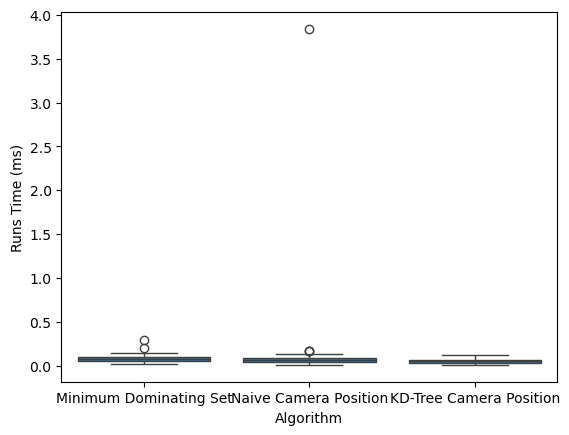

In [59]:
import seaborn as sns

sns.boxplot(x='Algorithm', y='Runs Time (ms)', data=data)

<Axes: xlabel='Node Size', ylabel='Runs Time (ms)'>

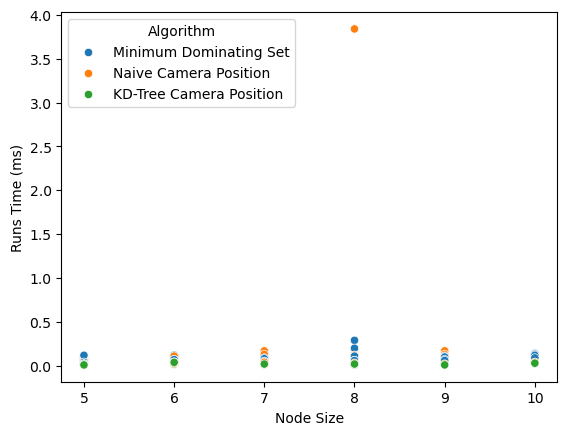

In [61]:
sns.scatterplot(x='Node Size', y='Runs Time (ms)', hue='Algorithm', data=data)

<Axes: xlabel='Algorithm', ylabel='Node Size'>

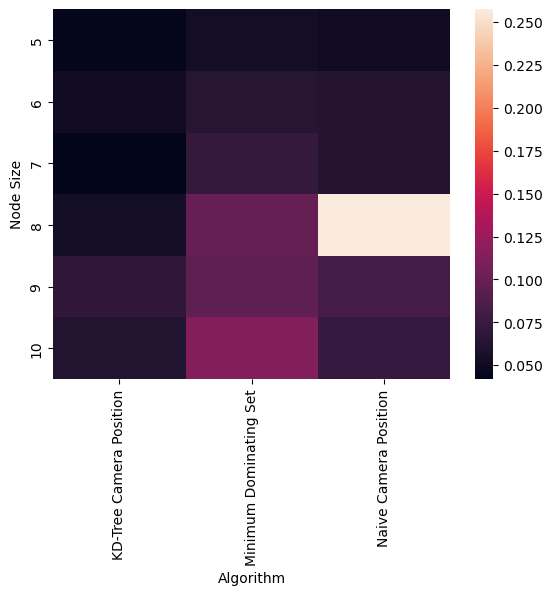

In [63]:
# Assuming you have an additional factor 'Dataset'
pivot_table = data.pivot_table(index='Node Size', columns='Algorithm', values='Runs Time (ms)')
sns.heatmap(pivot_table)

In [83]:
# Calculate efficiency relative to a baseline algorithm
baseline_runtime = data[data['Algorithm'] == 'Minimum Dominating Set']['Runs Time (ms)'].mean()
data['Efficiency'] = data['Runs Time (ms)'] / baseline_runtime

# Print the efficiency values
print(data['Efficiency'])

0       3.532278
1      46.772229
2       1.461632
3       1.096224
4       1.096224
         ...    
295     0.487211
296     0.243605
297     0.730816
298     0.243605
299     0.121803
Name: Efficiency, Length: 300, dtype: float64
